In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage.io as skio
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
# Get images Grayscale
trainingDataIn = []
for filename in os.listdir('./Images/Input/'):
    ogimage = skio.imread(fname='./Images/Input/'+filename)
    ogimage = ogimage/255
    trainingDataIn.append(ogimage)
trainingDataIn = np.array(trainingDataIn)
trainingDataIn.shape

# Get images RGB
trainingDataOut = []
for filename in os.listdir('./Images/Output/'):
    ogimage = skio.imread(fname='./Images/Output/'+filename)
    ogimage = ogimage/255
    trainingDataOut.append(ogimage)
trainingDataOut = np.array(trainingDataOut)
trainingDataOut.shape

(541, 400, 400)

(541, 400, 400, 3)

In [3]:
# Selecting shuffled index and seperating training and test data

shuffledindex = np.random.choice(range(0,len(trainingDataIn)),len(trainingDataIn),replace=False)
# start to 80% is training data
trainingindices = shuffledindex[:int(0.80*len(trainingDataIn))]
# 80% to end data is test data
testindices = shuffledindex[int(0.80*len(trainingDataIn)):]

In [4]:
trainImagesX = trainingDataIn[trainingindices].reshape((-1,400,400,1))
trainImagesY = trainingDataOut[trainingindices].reshape((-1,400,400,3))

testImagesX = trainingDataIn[testindices].reshape((-1,400,400,1))
testImagesY = trainingDataOut[testindices].reshape((-1,400,400,3))

In [5]:
trainImagesX.shape
trainImagesY.shape

testImagesX.shape
testImagesY.shape

(432, 400, 400, 1)

(432, 400, 400, 3)

(109, 400, 400, 1)

(109, 400, 400, 3)

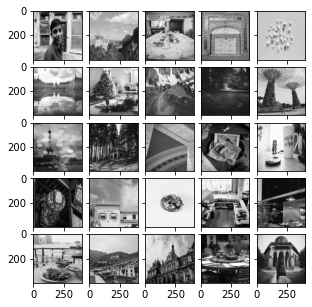

In [6]:
# Grayscale Input
# Getting images and sizing them
# Collecting images in a grid

fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 5x5 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for i,ax in enumerate(grid):
    # Iterating over the grid returns the Axes.
    temp = ax.imshow(trainImagesX[i],cmap=plt.cm.gray)

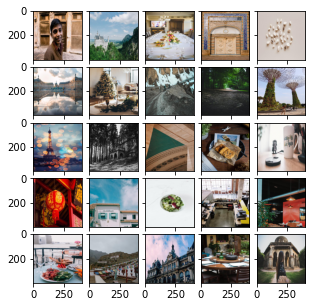

In [7]:
# RGB images for reference
# Getting images and sizing them
# Collecting images in a grid

fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5, 5),  # creates 5x5 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
for i,ax in enumerate(grid):
    # Iterating over the grid returns the Axes.
    temp = ax.imshow(trainImagesY[i])

In [8]:
# Building the neural network networkvalid
# Sequential model
model = Sequential()

# Size of image of gray scale will be 400*400
model.add(InputLayer(input_shape=(400, 400, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

# Upscaling to 400, after loss to 200
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))

# Upscaling to 400, after loss to 200
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [9]:
model.compile(optimizer='adam',loss='mse',metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 256)     147712    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 400, 400, 256)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 400, 400, 128)     295040    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 400, 400, 128)     147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 400, 400, 128)     1

In [12]:
model.fit(x=trainImagesX, 
    y=trainImagesY,
    batch_size=10,
    epochs=100,callbacks=[callback],steps_per_epoch=5)

Epoch 1/100
5/5 [==============================] - 151s 30s/step - loss: 0.2763 - accuracy: 0.2562
Epoch 2/100
5/5 [==============================] - 153s 31s/step - loss: 0.0868 - accuracy: 0.3177
Epoch 3/100
5/5 [==============================] - 158s 32s/step - loss: 0.0428 - accuracy: 0.3734
Epoch 4/100
5/5 [==============================] - 154s 31s/step - loss: 0.0330 - accuracy: 0.3755
Epoch 5/100
5/5 [==============================] - 153s 31s/step - loss: 0.0253 - accuracy: 0.3353
Epoch 6/100
5/5 [==============================] - 152s 30s/step - loss: 0.0273 - accuracy: 0.3471
Epoch 7/100
5/5 [==============================] - 153s 31s/step - loss: 0.0223 - accuracy: 0.3958
Epoch 8/100
5/5 [==============================] - 151s 30s/step - loss: 0.0220 - accuracy: 0.3797
Epoch 9/100
5/5 [==============================] - 122s 24s/step - loss: 0.0245 - accuracy: 0.3848
Epoch 10/100
5/5 [==============================] - 152s 30s/step - loss: 0.0209 - accuracy: 0.3721
Epoch 11/

In [13]:
print(model.evaluate(testImagesX, testImagesY, batch_size=10))

11/11 [==============================] - 95s 9s/step - loss: 0.0103 - accuracy: 0.5581
[0.010295610874891281, 0.5581359267234802]


In [26]:
test = testImagesX[10].reshape((1,400,400,1))

In [27]:
output = model.predict(test) 

In [28]:
# Output image resizing with 255 pixel sizes

outputImage = np.rint(output[0]*255)
outputImage = outputImage.astype(int)

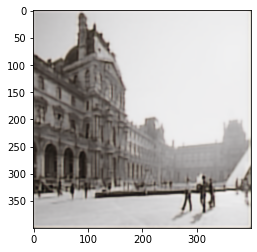

In [29]:
plt.imshow(outputImage)

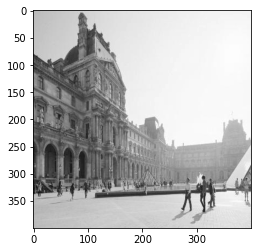

In [24]:
plt.imshow(testImagesX[10], cmap = plt.cm.gray)

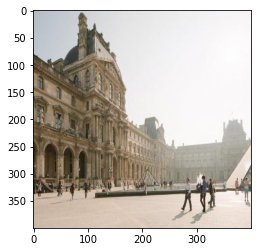

In [25]:
plt.imshow(testImagesY[10])